# Spotting Data Relationships

## 5W's + 1

#### Who is engaging with our content? 

Anyone who is interested in the instances of worker absenteeism. More specifically, manangers who are interested in employee happiness and satisfaction might be interested in this content as they try to understand how to craft a more modern, flexible Paid Time Off policy for the future of work.

#### What have you done?

I have been tasked with conducting an analysis on a large available dataset of absenteeism. I am working to draw out insights that might be helpful for the panel discussion.

#### Where did the users come from to see the content?

Managers come from a variety of different companies in various industries, but what they have in common is their interest and investment in employee happiness and satisfaction.

#### Was there some other event at the same time? (When)

The managers are attending a summit with many panels, some of which may overlap with the panel on absenteeism. It will be important to make this information available to those who may not be present at the panel but are still interested in the information.

#### Why do we get the results we're seeing?

No results have been produced yet; however, managers are interested in this absenteeism panel because absentee patterns may shed insight on how to best draft the employee Paid Time Off policies.

#### How many people saw this content?

A variety of managers will see this content, and perhaps even share it with others.

## Exploratory Analysis

### Basic information

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Absenteeism_at_work.tsv', sep='\t')

In [3]:
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [4]:
df.shape

(740, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

In [7]:
df.dtypes

ID                                   int64
Reason for absence                   int64
Month of absence                     int64
Day of the week                      int64
Seasons                              int64
Transportation expense               int64
Distance from Residence to Work      int64
Service time                         int64
Age                                  int64
Work load Average/day              float64
Hit target                           int64
Disciplinary failure                 int64
Education                            int64
Son                                  int64
Social drinker                       int64
Social smoker                        int64
Pet                                  int64
Weight                               int64
Height                               int64
Body mass index                      int64
Absenteeism time in hours            int64
dtype: object

In [8]:
df.isnull().any()

ID                                 False
Reason for absence                 False
Month of absence                   False
Day of the week                    False
Seasons                            False
Transportation expense             False
Distance from Residence to Work    False
Service time                       False
Age                                False
Work load Average/day              False
Hit target                         False
Disciplinary failure               False
Education                          False
Son                                False
Social drinker                     False
Social smoker                      False
Pet                                False
Weight                             False
Height                             False
Body mass index                    False
Absenteeism time in hours          False
dtype: bool

In [31]:
df.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


### See what months have the most absences using a histogram

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Absences')

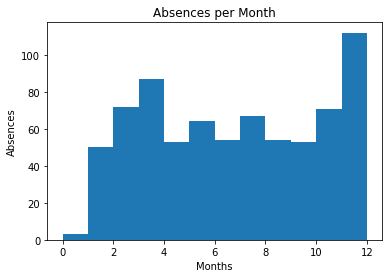

In [19]:
plt.hist(df['Month of absence'], bins=12);
plt.title('Absences per Month')
plt.xlabel('Months')
plt.ylabel('Absences')

### See what day of the week is most often missed

In [20]:
import seaborn as sns

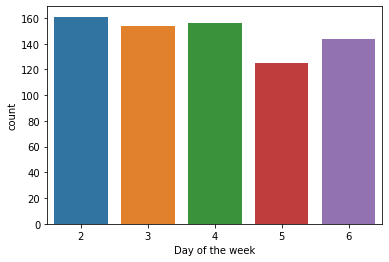

In [21]:
sns.countplot(df['Day of the week'])

### Find average workload of workers from absence info

In [24]:
df['Work load Average/day '].mean()

271.49023513513544

### Use boxplot to analyze the workers' transportation expenses

Text(0.5, 1.0, 'Summary of Transportation Expenses')

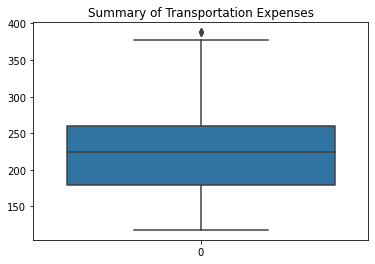

In [25]:
sns.boxplot(data=df['Transportation expense']).set_title('Summary of Transportation Expenses')

### Compare the median transportation expense to the mean

In [26]:
df['Transportation expense'].mean()

221.32972972972973

In [27]:
df['Transportation expense'].median()

225.0

### Use boxplot to analyze the workers' distance from home

Text(0.5, 1.0, "Summary of Workers' Distance to Work")

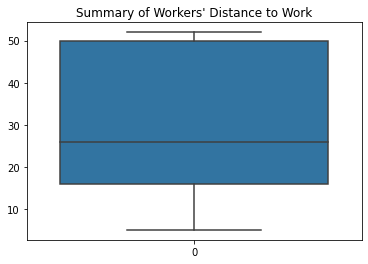

In [28]:
sns.boxplot(data=df['Distance from Residence to Work']).set_title('Summary of Workers\' Distance to Work')

### Compare the median distance to the mean distance

In [29]:
df['Distance from Residence to Work'].mean()

29.63108108108108

In [30]:
df['Distance from Residence to Work'].median()

26.0

## Skepticism and Hyman's Maxim

### Disprove the correlation null hypothesis

In [37]:
df.groupby(['Social drinker', 'Social smoker']).count()

ID  Reason for absence  Month of absence  \
Social drinker Social smoker                                              
0              0              286                 286               286   
               1               34                  34                34   
1              0              400                 400               400   
               1               20                  20                20   

                              Day of the week  Seasons  \
Social drinker Social smoker                             
0              0                          286      286   
               1                           34       34   
1              0                          400      400   
               1                           20       20   

                              Transportation expense  \
Social drinker Social smoker                           
0              0                                 286   
               1                                  34   
1              0                                 400   
               1                                  20   

                              Distance from Residence to Work  Service time  \
Social drinker Social smoker                                                  
0              0                                          286           286   
               1                                           34            34   
1              0                                          400           400   
               1                                           20            20   

                              Age  Work load Average/day   Hit target  \
Social drinker Social smoker                                            
0              0              286                     286         286   
               1               34                      34          34   
1              0              400                     400         400   
               1               20                      20          20   

                              Disciplinary failure  Education  Son  Pet  \
Social drinker Social smoker                                              
0              0                               286        286  286  286   
               1                                34         34   34   34   
1              0                               400        400  400  400   
               1                                20         20   20   20   

                              Weight  Height  Body mass index  \
Social drinker Social smoker                                    
0              0                 286     286              286   
               1                  34      34               34   
1              0                 400     400              400   
               1                  20      20               20   

                              Absenteeism time in hours  
Social drinker Social smoker                             
0              0                                    286  
               1                                     34  
1              0                                    400  
               1                                     20

As can be seen in the groupby object above, there are 34 people that are just social smokers (0, 1) along with 400 people that are just social drinkers (1, 0). This disproves the correlation null hypothesis that states social drinking and social smoking are the same trait.

### Disprove the independent samples null hypothesis

In [38]:
age_below_30 = df[df['Age'] < 30]
age_above_40 = df[df['Age'] > 40]

In [43]:
age_below_30.mean()

ID                                  23.541985
Reason for absence                  19.206107
Month of absence                     6.595420
Day of the week                      3.847328
Seasons                              2.664122
Transportation expense             256.916031
Distance from Residence to Work     30.450382
Service time                         7.022901
Age                                 28.000000
Work load Average/day              275.658420
Hit target                          94.877863
Disciplinary failure                 0.038168
Education                            1.122137
Son                                  0.770992
Social drinker                       0.236641
Social smoker                        0.053435
Pet                                  1.908397
Weight                              72.580153
Height                             171.885496
Body mass index                     24.404580
Absenteeism time in hours            5.412214
dtype: float64

In [42]:
age_above_40.mean()

ID                                  24.687943
Reason for absence                  16.801418
Month of absence                     6.517730
Day of the week                      3.929078
Seasons                              2.560284
Transportation expense             216.078014
Distance from Residence to Work     21.333333
Service time                        15.843972
Age                                 46.425532
Work load Average/day              269.326078
Hit target                          94.163121
Disciplinary failure                 0.113475
Education                            1.085106
Son                                  1.035461
Social drinker                       0.666667
Social smoker                        0.092199
Pet                                  0.609929
Weight                              86.695035
Height                             171.354610
Body mass index                     29.588652
Absenteeism time in hours            8.375887
dtype: float64

As seen in the differing averages above, the two groups do not have the same data and thus do not behave the same.

### Disprove the Chi-squared independence null hypothesis

In [55]:
import scipy

In [56]:
corr, pvalue = scipy.stats.pearsonr(df['Transportation expense'], df['Distance from Residence to Work'])

In [57]:
corr, pvalue

(0.2621831106319081, 4.2533009832568887e-13)

The p-value between the transportation expense and distance between residence and work columns is less than 0.001, so there is positive correlation between these two columns - as in, as transportation expense increases, so does the distance between residence and work.

### Disprove the repeated measures null hypothesis

In [58]:
df['ID'].value_counts()

3     113
28     76
34     55
22     46
20     42
11     40
15     37
36     34
24     30
14     29
33     24
10     24
1      23
17     20
5      19
18     16
13     15
25     10
6       8
9       8
23      8
27      7
30      7
12      7
7       6
2       6
29      5
26      5
32      5
31      3
19      3
21      3
16      2
8       2
35      1
4       1
Name: ID, dtype: int64

In [59]:
emp_3 = df[df['ID'] == 3]

In [60]:
emp_3.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
5,3,23,7,6,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
13,3,11,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,1
14,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,4
16,3,23,7,6,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2


The table above considers the first five absences for the worker whose ID is 3. If the repeated measures null hypothesis were true, each column would contain a single value. This is not the case - we see that the workers' day of the week and reasons for absence vary, indicating that the values change with time. 

# Choosing Relationships to Visualize

### Observations Following Conditional Formatting

1: I notice that reasons for absences vary greatly; however, there are 5 to 6 reasons that seem to be more common than the rest and constitute the majority of the reasons for absences. Paying attention to these may help the employers determine a better PTO policy.

2: I notice that absences increase significantly in April and December, perhaps with the number of workers that take absences corresponding to spring break or holidays. It would be good for employers to understand this while drafting a PTO policy.

3: I notice that absence hours generally increase as the work load average per day increases, though this may not be a very strong correlation. It would still be good for employers to be aware of this.

4: I notice that there are several people for whom the distance from residence to work and the number of absence hours are very high. This relationship may be good to visualize.

5: I notice that there is also a number of people for whom the transportation expense and number of absence hours are very high. This relationship may also be good to visualize and may assist in drafting a PTO policy.